In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [1]:
crop_left_right = 12
crop_top_bottom = 3
default_image_size = 32

In [3]:
def resize_image(rgb_image, size=(32, 32)):
    return cv2.resize(rgb_image, size)

def mask_image_get_brightness_vector(rgb_image):
    resized_image = resize_image(rgb_image, (default_image_size, default_image_size))
    hsv = cv2.cvtColor(resized_image, cv2.COLOR_RGB2HSV)

    lower_red1 = np.array([0, 70, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 70, 50])
    upper_red2 = np.array([180, 255, 255])

    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    lower_green = np.array([40, 70, 50])
    upper_green = np.array([80, 255, 255])

    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    masked_red_image = cv2.bitwise_and(resized_image, resized_image, mask=mask_red)
    masked_yellow_image = cv2.bitwise_and(resized_image, resized_image, mask=mask_yellow)
    masked_green_image = cv2.bitwise_and(resized_image, resized_image, mask=mask_green)

    cropped_hsv = hsv[crop_top_bottom:default_image_size-crop_top_bottom,crop_left_right:default_image_size-crop_left_right]

    brightness = cropped_hsv[:, :, 2]
    brightness_vector = np.sum(brightness, axis=1)

    return (resized_image, masked_red_image, masked_yellow_image, masked_green_image,cropped_hsv, brightness_vector)


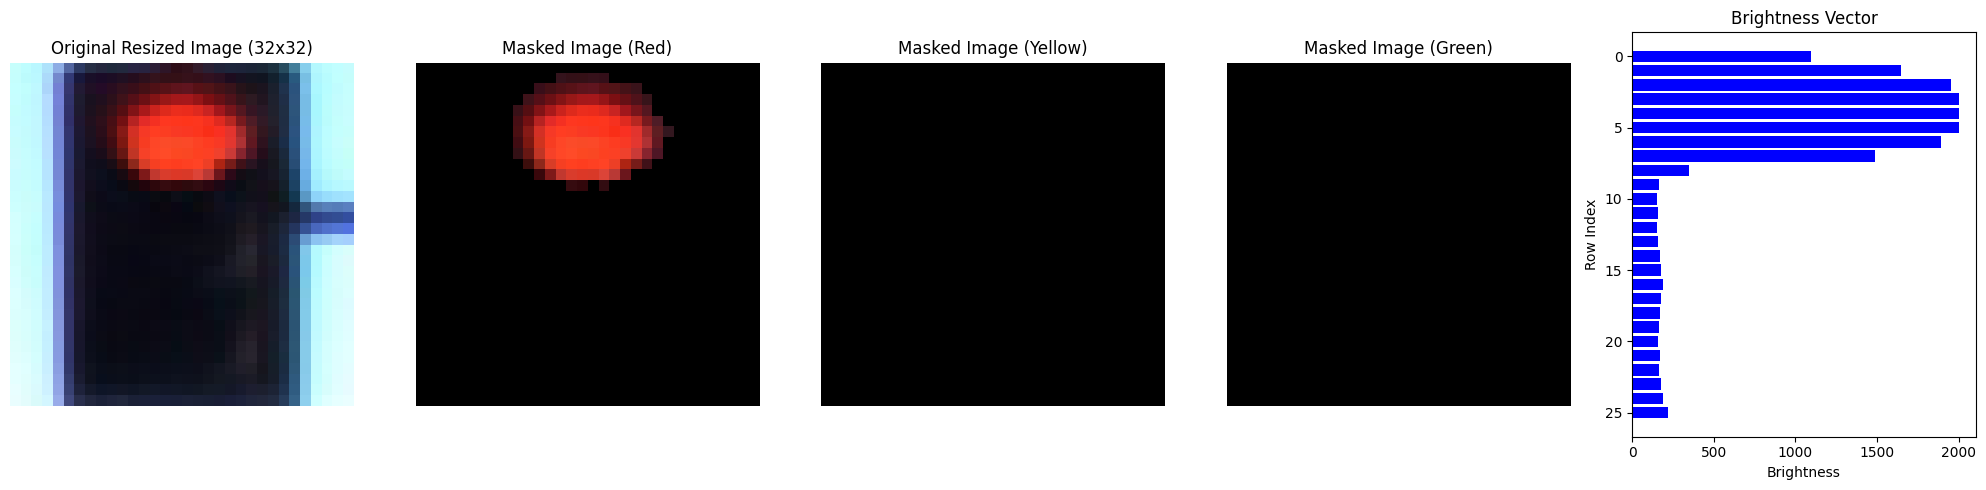

The color with the highest brightness is Red.


In [5]:
input_image = cv2.imread('/content/box_dayClip3--00494.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Get resized, masked, and cropped images and the brightness vector
(resized_image, masked_red_image, masked_yellow_image, masked_green_image,cropped_image, brightness_vector) = mask_image_get_brightness_vector(input_image)

# Display images
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(resized_image)
plt.title("Original Resized Image (32x32)")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(masked_red_image)
plt.title("Masked Image (Red)")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(masked_yellow_image)
plt.title("Masked Image (Yellow)")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(masked_green_image)
plt.title("Masked Image (Green)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.barh(range(len(brightness_vector)), brightness_vector, color='blue')
plt.gca().invert_yaxis()
plt.title("Brightness Vector")
plt.xlabel("Brightness")
plt.ylabel("Row Index")

plt.tight_layout()
plt.show()

# Calculate the sum of brightness for each color mask
red_brightness_sum = np.sum(masked_red_image[:, :, 0])  # Sum of red
yellow_brightness_sum = np.sum(masked_yellow_image[:, :, 0])  # Sum of yellow
green_brightness_sum = np.sum(masked_green_image[:, :, 0])  # Sum of green


color_brightness = {'Red': red_brightness_sum,'Yellow': yellow_brightness_sum,'Green': green_brightness_sum}

# Find the color with the maximum brightness
max_color = max(color_brightness, key=color_brightness.get)
max_brightness_value = color_brightness[max_color]

print(f"The color with the highest brightness is {max_color}.")
